## Billionaires Statistic Dataset

The goal of creating a prediction model with ‘finalWorth’ as the target variable would be to predict the net worth of billionaires based on other features in your dataset.

This could be useful in a variety of contexts. For example, economists or financial analysts might be interested in understanding the factors that contribute to a person’s wealth. By training a model on historical data, you could potentially identify patterns or trends that are associated with higher net worth.

In addition, the model could be used to predict the future net worth of individuals based on current data. This could be useful for investment strategies, economic forecasting, or policy making.

In [23]:
%matplotlib notebook
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from scipy import stats
import copy
import pylab
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## The dataset

This dataset contains statistics on the world's billionaires, including information about their businesses, industries, and personal details. It provides insights into the wealth distribution, business sectors, and demographics of billionaires worldwide. It has over 2500 billionaires and 35 attributes related to each of them.

In [31]:
df=pd.read_csv('D:/pulki/Downloads/archive (1)/Billionaires Statistics Dataset.csv')

In [25]:
print(df.shape)

(2640, 35)


In [26]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


Because the dataset is rather large, we prepare a small subset of the data as training set, and another subset as test set. To make the computations reproducible, we set the random seed.

In [27]:
for col in df.columns:
    print(col)

rank
finalWorth
category
personName
age
country
city
source
industries
countryOfCitizenship
organization
selfMade
status
gender
birthDate
lastName
firstName
title
date
state
residenceStateRegion
birthYear
birthMonth
birthDay
cpi_country
cpi_change_country
gdp_country
gross_tertiary_education_enrollment
gross_primary_education_enrollment_country
life_expectancy_country
tax_revenue_country_country
total_tax_rate_country
population_country
latitude_country
longitude_country


Let's remove some irrelevant columns that we will not require for the prediction.

In [32]:
df.drop('rank', axis=1, inplace=True)
df.drop('city', axis=1, inplace=True)
df.drop('source', axis=1, inplace=True)
df.drop('category', axis=1, inplace=True)  ## same as industry
df.drop('organization', axis=1, inplace=True)
df.drop('birthDate', axis=1, inplace=True)
df.drop('lastName', axis=1, inplace=True)
df.drop('firstName', axis=1, inplace=True)
df.drop('date', axis=1, inplace=True)
df.drop('state', axis=1, inplace=True)
df.drop('birthYear', axis=1, inplace=True)
df.drop('birthMonth', axis=1, inplace=True)
df.drop('birthDay', axis=1, inplace=True)
df.drop('personName', axis=1, inplace=True)
df.drop('residenceStateRegion', axis=1, inplace=True)

In [33]:
df.head()

,finalWorth,age,country,industries,countryOfCitizenship,selfMade,status,gender,title,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,211000,74.0,France,Fashion & Retail,France,False,U,M,Chairman and CEO,110.05,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,180000,51.0,United States,Automotive,United States,True,D,M,CEO,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,114000,59.0,United States,Technology,United States,True,D,M,Chairman and Founder,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,107000,78.0,United States,Technology,United States,True,U,M,CTO and Founder,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,106000,92.0,United States,Finance & Investments,United States,True,D,M,CEO,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


That's better.

In [34]:
for col in df.columns:
    print(col)

finalWorth
age
country
industries
countryOfCitizenship
selfMade
status
gender
title
cpi_country
cpi_change_country
gdp_country
gross_tertiary_education_enrollment
gross_primary_education_enrollment_country
life_expectancy_country
tax_revenue_country_country
total_tax_rate_country
population_country
latitude_country
longitude_country


Let's check which columns are non numeric.

In [35]:
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)

Index(['country', 'industries', 'countryOfCitizenship', 'selfMade', 'status',
       'gender', 'title', 'gdp_country'],
      dtype='object')


In [36]:
df['gdp_country'] = df['gdp_country'].replace('[\$,]', '', regex=True).astype(float) ##converting gpd_country to numeric

In [37]:
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)

Index(['country', 'industries', 'countryOfCitizenship', 'selfMade', 'status',
       'gender', 'title'],
      dtype='object')


In [38]:
df.head()

,finalWorth,age,country,industries,countryOfCitizenship,selfMade,status,gender,title,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,211000,74.0,France,Fashion & Retail,France,False,U,M,Chairman and CEO,110.05,1.1,2.715518e+12,65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,180000,51.0,United States,Automotive,United States,True,D,M,CEO,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,114000,59.0,United States,Technology,United States,True,D,M,Chairman and Founder,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,107000,78.0,United States,Technology,United States,True,U,M,CTO and Founder,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,106000,92.0,United States,Finance & Investments,United States,True,D,M,CEO,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


Let's see the numeric columns now which we can use to find correlations with finalWorth and make scatterplots

In [40]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
print(numeric_columns)


Index(['finalWorth', 'age', 'cpi_country', 'cpi_change_country', 'gdp_country',
       'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')


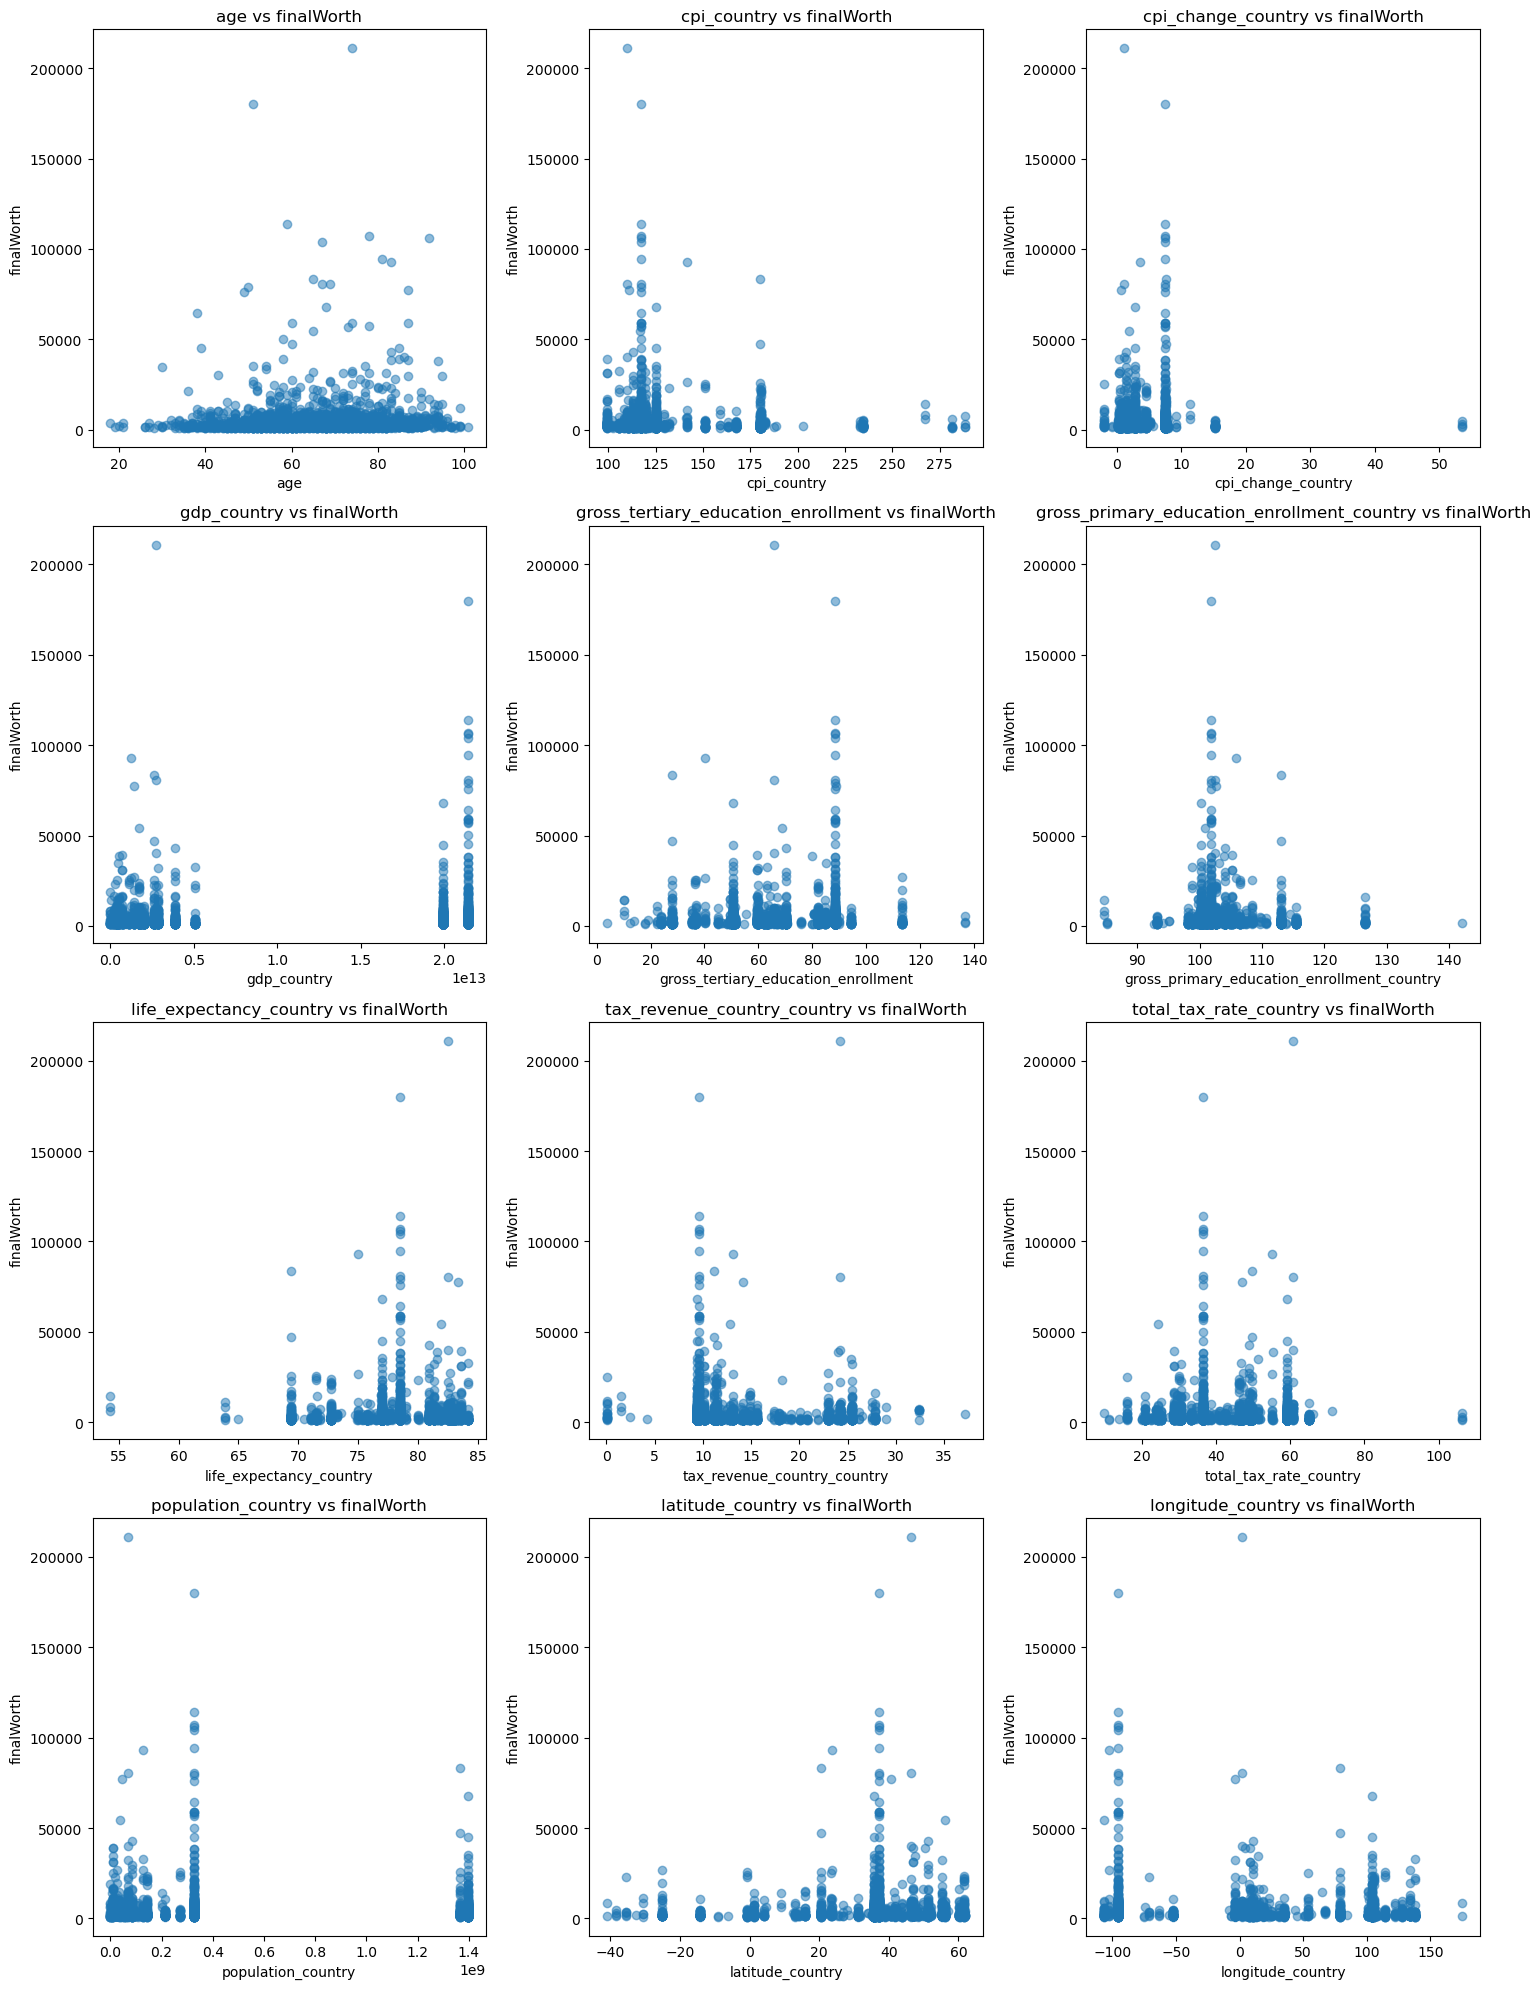

In [42]:
numeric_columns = ['age', 'cpi_country', 'cpi_change_country', 'gdp_country',
                   'gross_tertiary_education_enrollment',
                   'gross_primary_education_enrollment_country', 
                   'life_expectancy_country', 'tax_revenue_country_country', 
                   'total_tax_rate_country', 'population_country', 
                   'latitude_country', 'longitude_country']

# Determine the number of rows and columns for your subplot grid
n = len(numeric_columns)
ncols = 3
nrows = n // ncols + (n % ncols > 0)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*5))

# Flatten the axes array and iterate over it and the numeric_columns together
for ax, col in zip(axes.flatten(), numeric_columns):
    ax.scatter(df[col], df['finalWorth'], alpha=0.5)
    ax.set_title(f'{col} vs finalWorth')
    ax.set_xlabel(col)
    ax.set_ylabel('finalWorth')

# Remove any unused subplots
if len(numeric_columns) < nrows*ncols:
    for ax in axes.flatten()[len(numeric_columns):]:
        fig.delaxes(ax)

plt.tight_layout()
plt.show()


Let's look at some numbers. Correlations of each of these numeric features with finalWorth

In [43]:
correlations = df[numeric_columns + ['finalWorth']].corr()['finalWorth'].drop('finalWorth')
print(correlations)

age                                           0.067053
cpi_country                                  -0.042842
cpi_change_country                            0.035702
gdp_country                                   0.037589
gross_tertiary_education_enrollment           0.066711
gross_primary_education_enrollment_country   -0.008880
life_expectancy_country                       0.021819
tax_revenue_country_country                  -0.009270
total_tax_rate_country                       -0.036381
population_country                           -0.053024
latitude_country                              0.031122
longitude_country                            -0.101048
Name: finalWorth, dtype: float64


The correlations are really low. That looks like a problem. However, there are a few things to keep in mind:

Non-linear relationships: Correlation coefficients measure linear relationships. If the relationship between a feature and ‘finalWorth’ is non-linear, the correlation coefficient may be low, even though the feature is useful for prediction. You could explore non-linear relationships visually using scatter plots, or consider non-linear models.

Interactions between features: Sometimes, the combination of two or more features can be predictive, even if each feature individually is not. For example, perhaps ‘age’ and ‘gdp_country’ together are predictive of ‘finalWorth’, even though each one individually is not. Some machine learning models, like decision trees and neural networks, can capture these interactions.

Feature engineering: You could create new features that might be more predictive. For example, you could create a feature that represents the ratio of ‘gdp_country’ to ‘population_country’, which might be more predictive than either feature alone.

Advanced models: Some machine learning models, like support vector machines or neural networks, can model complex relationships that simple linear regression cannot.

Let's look at Pair plots: Seaborn’s pairplot function can be used to visualize pairwise relationships in a dataset. It creates a grid of scatter plots by default, which can help you spot non-linear relationships.

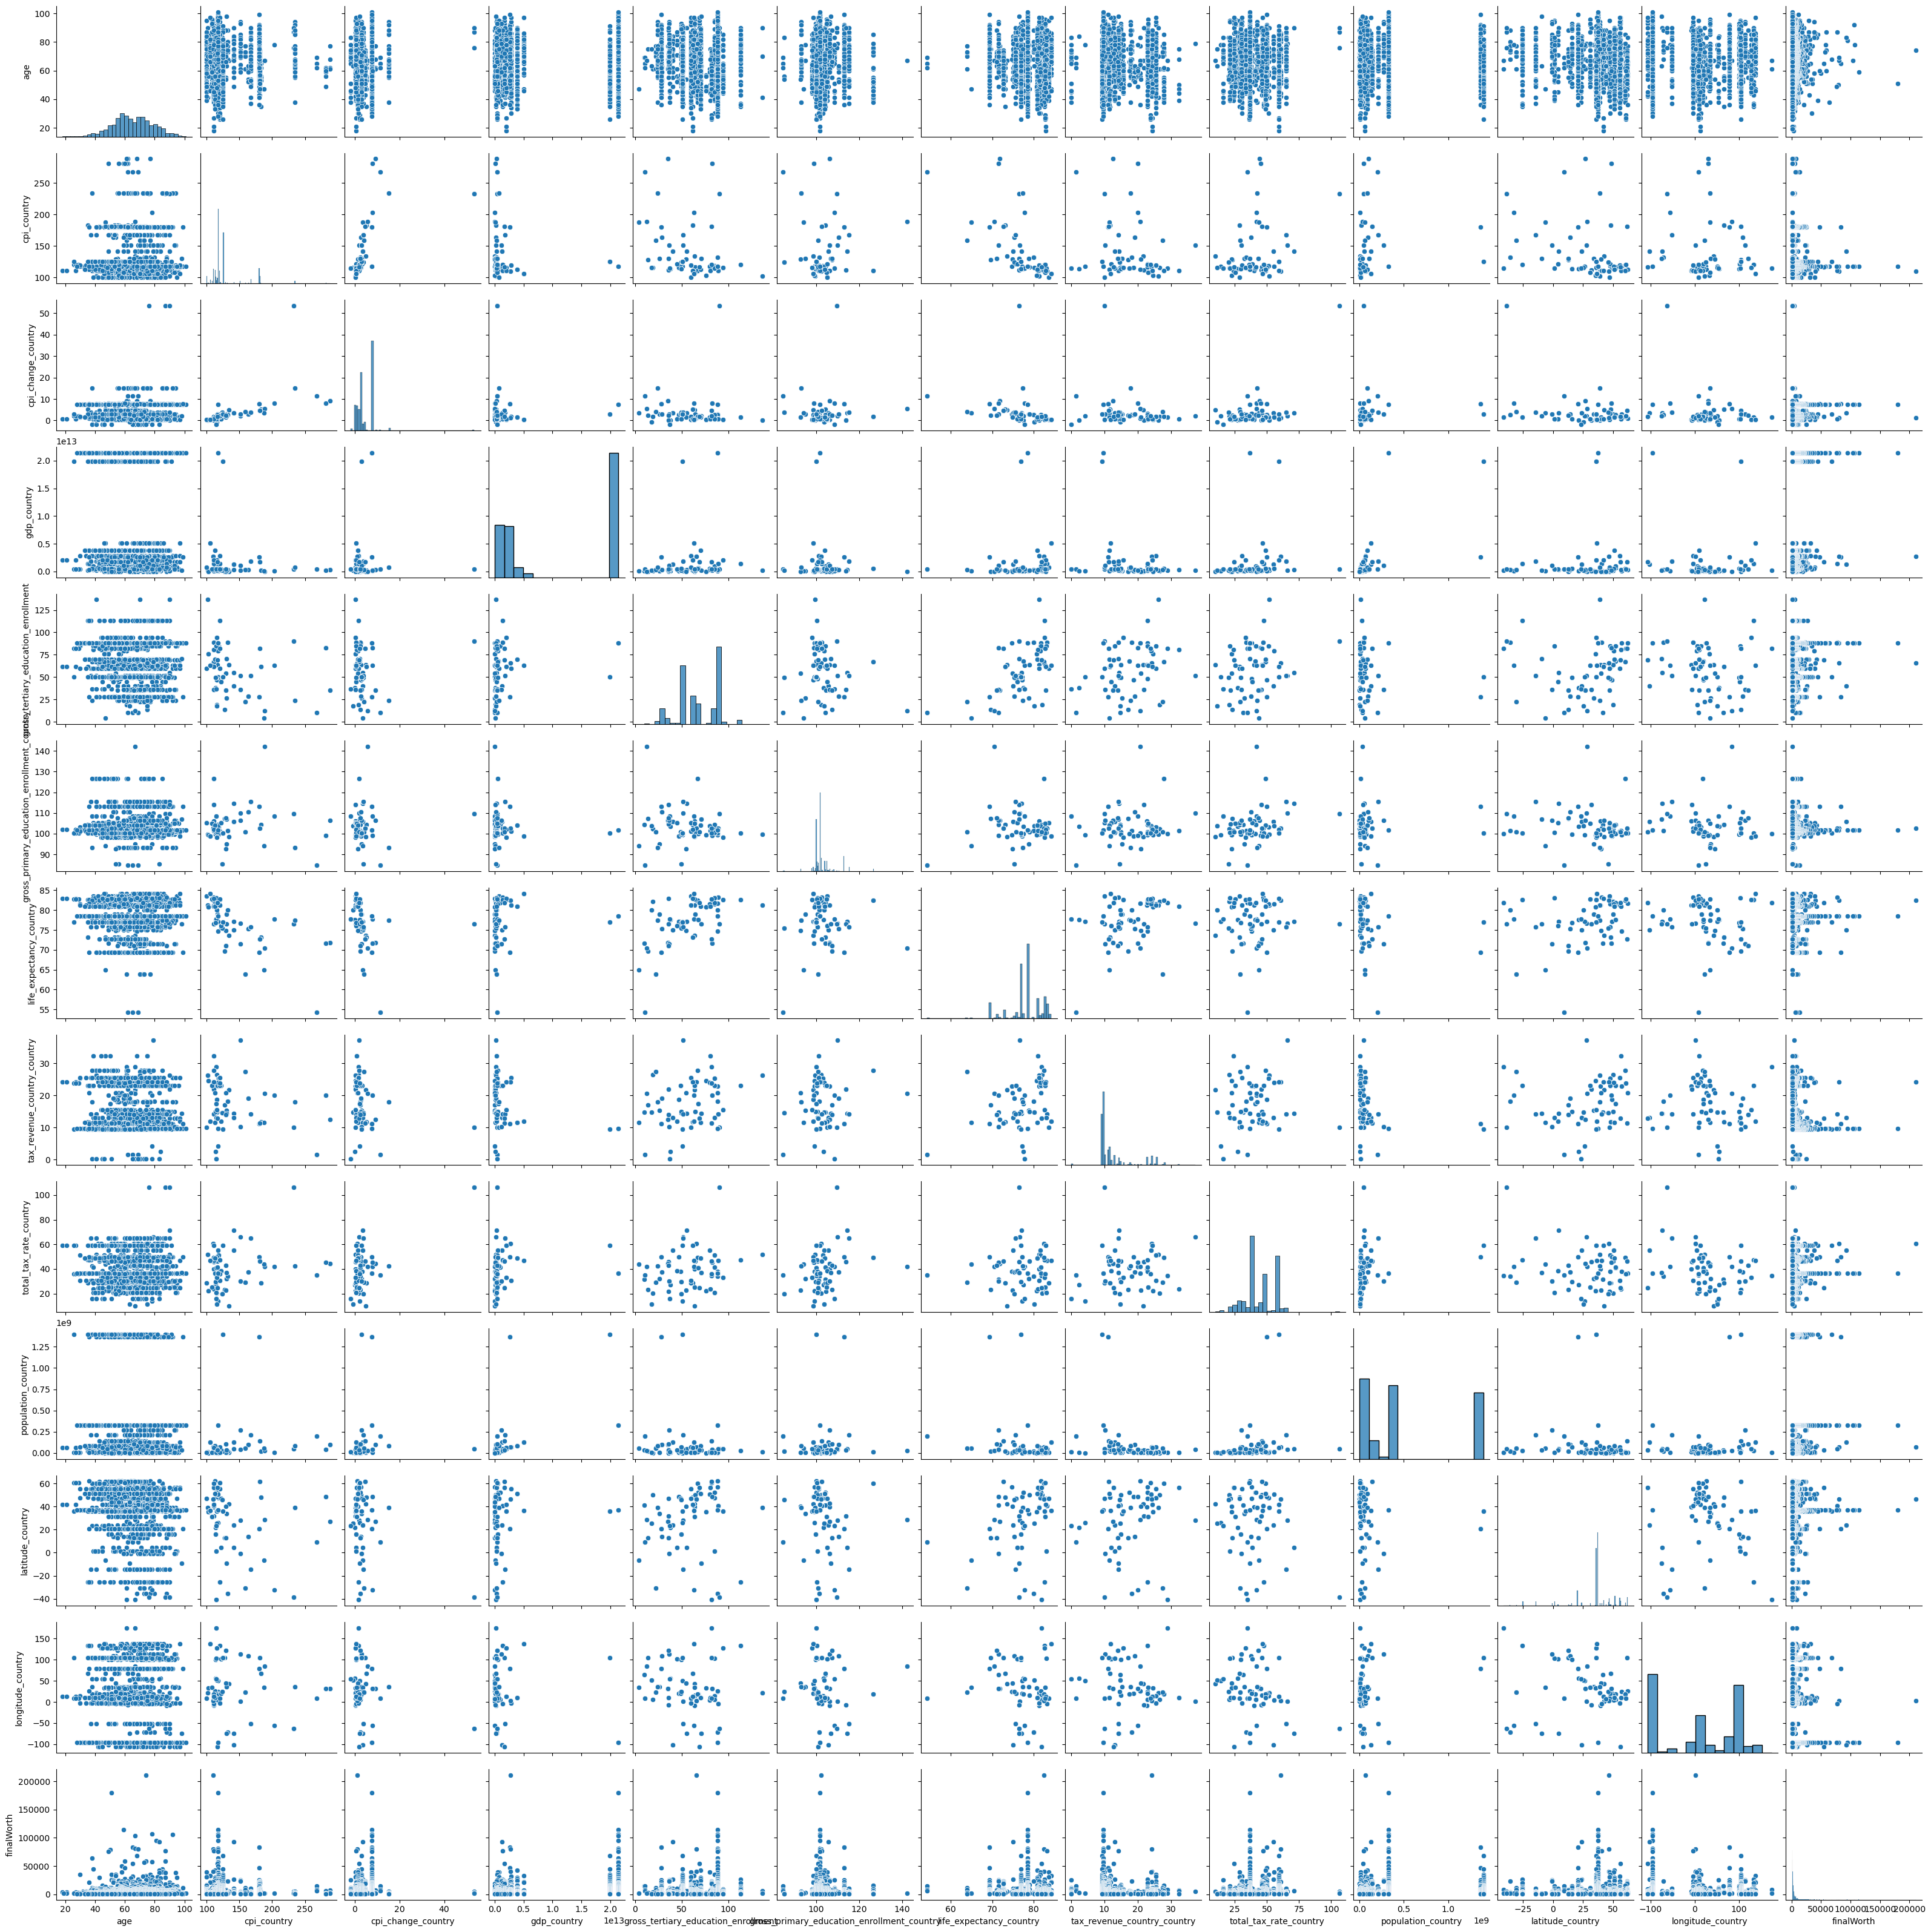

In [45]:
sns.pairplot(df[numeric_columns + ['finalWorth']])
plt.show()
